In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vector = []
num_points = 100
for _ in range(num_points):
    x=np.random.uniform(0.0,90)
    # y= 0.23*x + 0.92 + Noise
    y=0.23 * x + 0.92 + np.random.normal(0,0.54)
    vector.append([x,y])

In [3]:
X_d = np.array([k[0] for k in vector])
y_d = np.array([k[1] for k in vector])

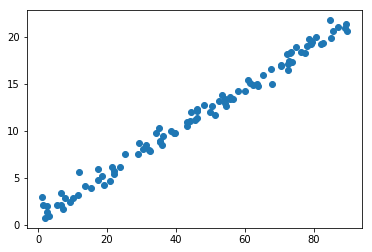

In [4]:
plt.scatter(X_d,y_d)
plt.show()

In [5]:
X_d = X_d.reshape((-1,1))
y_d = y_d.reshape((-1,1))

In [6]:
y_d.shape

(100, 1)

In [41]:
X=tf.placeholder(shape=[None,1],dtype=tf.float32)
y=tf.placeholder(shape=[None,1],dtype=tf.float32)

W= tf.Variable(tf.random_normal([1],0.5,0.5),name="Weight")
b= tf.Variable(tf.random_normal([1],0.5,0.5),name="bias")
y_p = tf.add(tf.multiply(X,W),b)

In [44]:
loss = tf.reduce_mean(tf.squared_difference(y_p,y))
optim = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optim.minimize(loss)

[None, 97.216759, array([-487.46261597], dtype=float32)]
[None, 5.8497005e+08, array([ 1198597.875], dtype=float32)]
[None, 3.5332704e+15, array([ -2.94574387e+09], dtype=float32)]
[None, 2.1341255e+22, array([  7.23963295e+12], dtype=float32)]
[None, 1.2890302e+29, array([ -1.77925473e+16], dtype=float32)]
[None, 7.7858545e+35, array([  4.37280084e+19], dtype=float32)]
[None, inf, array([ -1.07468524e+23], dtype=float32)]
[None, inf, array([  2.64120980e+26], dtype=float32)]
[None, inf, array([ -6.49119194e+29], dtype=float32)]
[None, inf, array([  1.59531337e+33], dtype=float32)]


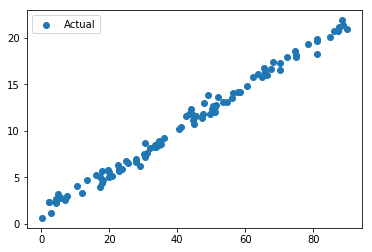

In [47]:
epoch = 10
init = tf.global_variables_initializer()
with tf.Session() as ss:
    ss.run(init)
    for step in range(epoch):
        print(ss.run([train,loss,W],feed_dict={X:X_d,y:y_d}))
        #print("Step = {}, Loss={}, W={}, b={}".format(step,ss.run(loss,feed_dict={X:X_d,y:y_d}),ss.run(W,feed_dict={X:X_d,y:y_d}),ss.run(b,feed_dict={X:X_d,y:y_d})))
    plt.scatter(X_d,y_d,label="Actual")
    #plt.plot(X_d,ss.run(W,feed_dict={X:X_d,y:y_d})*X_d + ss.run(b,feed_dict={X:X_d,y:y_d}),label="Predicted")
    plt.legend()
    plt.show()

# Dengan Tensorboard

In [7]:
with tf.name_scope("LinearReg") as scope:
    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="Weights")
    b = tf.Variable(tf.zeros([1.0]), name="Bias")
    y = W * X_d + b
    
with tf.name_scope("LossFunc") as scope:
    loss = tf.reduce_mean(tf.square(y-y_d))
    
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [8]:
loss_summary = tf.summary.scalar("loss",loss)
w_h = tf.summary.histogram("W",W)
b_h = tf.summary.histogram("b",b)

#Merge all the summaries
merged_op = tf.summary.merge_all()
init2=tf.global_variables_initializer()

In [ ]:
writer_tensorboard = tf.train.SummaryWriter('/home/leo/test', session.graph_def)

In [10]:
with tf.Session() as ss:
    ss.run(init2)
    writer_tensorboard = tf.contrib.summary.SummaryWriter("/train",ss.graph)
    for step in range(100):
        # Optimize one step
        ss.run(train)

        # Add summary (Everytime could be to much....)
        result_summary = ss.run(merged_op)    
        writer_tensorboard.add_summary(result_summary, step)


AttributeError: 'SummaryWriter' object has no attribute 'add_summary'